# Evaluating Random Forest Performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.ma.core import indices
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score, \
    classification_report
from scipy.stats import skew
from sqlalchemy import column

from practice_Evaluating_Classification_Models import feature_names

In [5]:
data = fetch_california_housing()
X,y = data.data, data.target
print(type(data.data))

<class 'numpy.ndarray'>


In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Reserve 20% of the data for evalution

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Explore the training data

In [12]:
eda = pd.DataFrame(data = X_train)
eda.columns = data.feature_names
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 2 to 2.65 are the most of the median house prices valued.

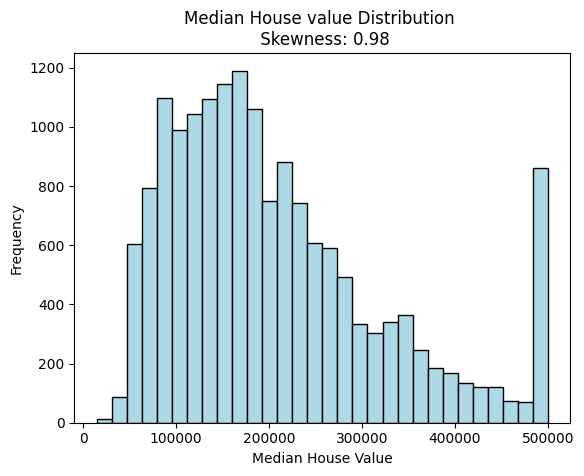

In [15]:
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House value Distribution \n Skewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Create a random forest regression model and evaluate its performance

## Model fitting and prediction
Let's fit a random forest regression model to the data  and use it to make median house price predictions. Use the default parameters, which includes using 100 base estimators, or regresion trees.

In [17]:
rf_regressor = RandomForestRegressor(n_estimators = 100,random_state=42)
rf_regressor.fit(X_train,y_train)

# predict on the test set
y_pred_test = rf_regressor.predict(X_test)


# Estimate out of sample MAE, MSE , RMSE , R-square

In [21]:
  def Estimate_out_of_sample(y_test, y_pred_test):
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test,y_pred_test)
    rmse = root_mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    print(f'MAE: {mae:.2f} \n')
    print(f'MSE: {mse:.2f} \n')
    print(f'RMSE: {rmse:.2f} \n')
    print(f'R-square: {r2:.2f} \n')
    return mae, mse, rmse, r2
  Estimate_out_of_sample(y_test, y_pred_test)


MAE: 0.33 

MSE: 0.26 

RMSE: 0.51 

R-square: 0.81 



(0.32754256845930246,
 0.2553684927247781,
 0.5053399773665033,
 0.8051230593157366)

## Model are predict good with r2 near 1, and mea also low

In [23]:
# plot histogram of the residual error (dollars)

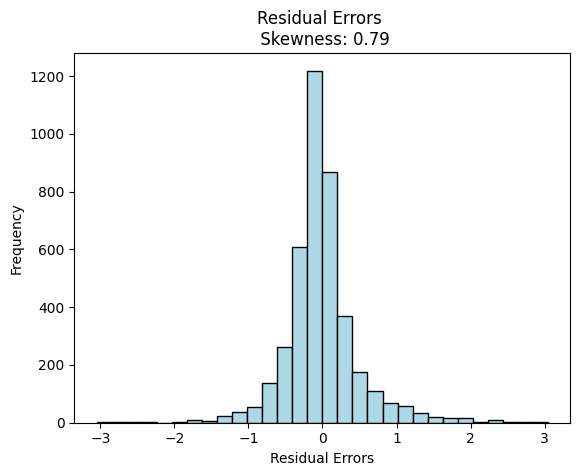

In [24]:
plt.hist(1e5*(y_test - y_pred_test), bins=30, color='lightblue', edgecolor='black')
plt.title(f'Residual Errors \n Skewness: {skew(y_test - y_pred_test):.2f}')
plt.xlabel('Residual Errors')
plt.ylabel('Frequency')
plt.show()

Average error = -1242
Standard deviation of error = 50518


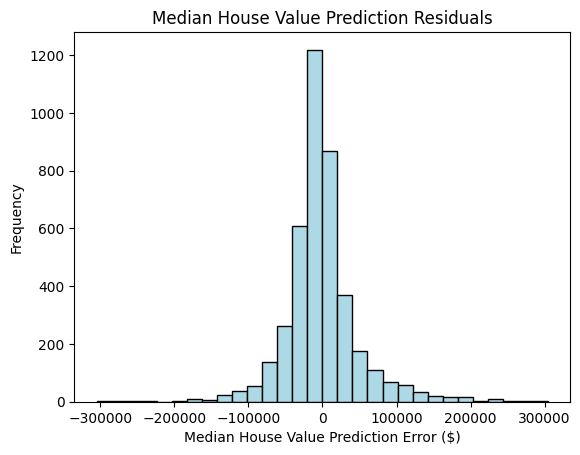

In [25]:


# Calculate the residual errors
residuals = 1e5 * (y_test - y_pred_test)

# Plot the histogram of the residuals
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print('Average error = ' + str(int(np.mean(residuals))))
print('Standard deviation of error = ' + str(int(np.std(residuals))))



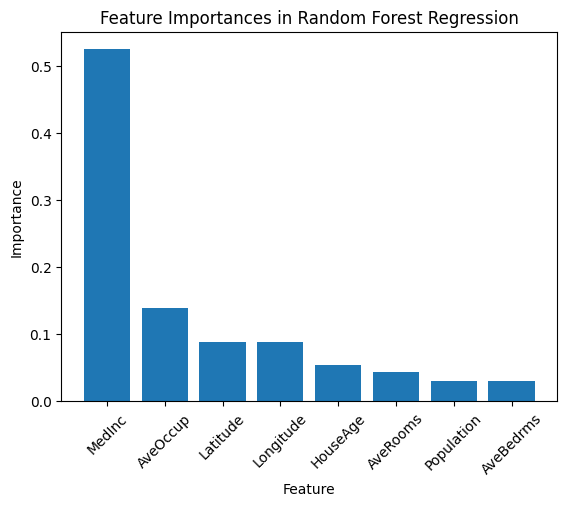

In [26]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()